# Resolución de ecuaciones diferenciales e interpolación

En este trabajo se aborda la resolución aproximada de ecuaciones diferenciales ordinarias (EDO) mediante el uso combinado de métodos numéricos e interpolación polinómica. La motivación principal es obtener soluciones continuas y evaluables en cualquier punto del dominio, incluso cuando la solución exacta de la EDO no está disponible o es difícil de calcular.

Para aproximar la solución de este problema, empleamos el **método de Euler**, una técnica de paso simple basada en el desarrollo de Taylor. Este método nos proporciona una secuencia discreta de puntos \( (x_i, y_i) \) que aproximan la curva solución de la EDO en un intervalo dado. Aunque es un método sencillo y computacionalmente eficiente, la solución resultante está compuesta por valores discretos y puede no capturar con precisión el comportamiento entre puntos, especialmente si se utiliza un paso grande.

Con el fin de obtener una función continua que aproxime la solución de la EDO, recurrimos a técnicas de **interpolación polinómica**. Estas permiten construir un polinomio \( P(x) \) tal que \( P(x_i) = y_i \), es decir, que pase exactamente por los puntos obtenidos mediante Euler. Esta función interpoladora puede evaluarse en cualquier valor de \( x \), proporcionando una aproximación continua y diferenciable (dependiendo del método) a la solución de la EDO.

Se aplicaron los siguientes métodos de interpolación:

- **Interpolación de Lagrange**, que construye el polinomio a partir de combinaciones lineales de polinomios base.
- **Interpolación de Neville**, que genera el polinomio usando una construcción recursiva eficiente.
- **Diferencias Divididas de Newton**, útil cuando los nodos no están equiespaciados.
- **Interpolación de Hermite**, que además de los valores de la función, incorpora las derivadas en los nodos.
- **Interpolación con Nodos Equiespaciados**, que usa el esquema de diferencias progresivas de Newton bajo la suposición de espaciado uniforme.

In [12]:
from sympy import symbols, lambdify, sympify

# Definir variables
x, y = symbols('x y')

# Input del usuario
expr_str = input("Ingrese la ecuación diferencial dy/dx = f(x, y): ")
f_expr = sympify(expr_str)
f = lambdify((x, y), f_expr, modules='numpy')
x0 = float(input("Ingrese x0 (inicio del intervalo): "))
y0 = float(input("Ingrese y0 (condición inicial): "))
xf = float(input("Ingrese xf (fin del intervalo): "))
h  = float(input("Ingrese el paso h: "))

print("EDO:")
print("dy/dx =", f_expr)
print(f"Condición inicial: y({x0}) = {y0}")
print(f"Intervalo de integración: de x = {x0} a x = {xf}, con paso h = {h}")

EDO:
dy/dx = -x**2 + y + 1
Condición inicial: y(0.0) = 0.5
Intervalo de integración: de x = 0.0 a x = 2.0, con paso h = 0.2


In [38]:
from sympy import Function, Eq, dsolve, simplify, lambdify
from sympy.core.function import AppliedUndef
import numpy as np

# Definir y como función de x
y_sym = Function('y')(x)

# Armar la EDO simbólica
edo = Eq(y_sym.diff(x), f_expr)

try:
    # Resolver simbólicamente con condición inicial
    sol = dsolve(edo, y_sym, ics={y_sym.subs(x, x0): y0})
    rhs = simplify(sol.rhs)

    print("Solución exacta encontrada:")
    display(rhs)

    # Verificar si hay funciones indefinidas que no permiten evaluación
    if rhs.has(AppliedUndef):
        raise ValueError("La solución contiene funciones indefinidas")

    # Convertir a función numérica con sympy de respaldo
    y_exact = lambdify(x, rhs, modules=["numpy", "sympy"])

    # Verificar si la evaluación numérica funciona
    try:
        Y_exact_interp = []
        for xi in X_interp:
            try:
                val = y_exact(xi)
                Y_exact_interp.append(float(val))
            except:
                Y_exact_interp.append(np.nan)  # si no se puede, usa NaN

        Y_exact_interp = np.array(Y_exact_interp)
        solucion_exacta_valida = not np.all(np.isnan(Y_exact_interp))

    except Exception as eval_err:
        print("No se pudo evaluar la solución exacta numéricamente:", eval_err)
        solucion_exacta_valida = False

except Exception as e:
    print("No se pudo resolver simbólicamente:", e)
    y_exact = None
    solucion_exacta_valida = False



Solución exacta encontrada:


-x**3/3 + x*y + x + 0.5

In [39]:
import numpy as np

# Inicializar listas con condiciones iniciales
X = [x0]
Y = [y0]

x_val = x0
y_val = y0

# Ejecutar el método de Euler
while x_val < xf:
    y_val = y_val + h * f(x_val, y_val)
    x_val = x_val + h
    X.append(x_val)
    Y.append(y_val)

# Convertir a arrays de NumPy
X = np.array(X)
Y = np.array(Y)

# Mostrar algunos resultados
for i in range(len(X)):
    print(f"x = {X[i]:.3f} | y ≈ {Y[i]:.5f}")


x = 0.000 | y ≈ 0.50000
x = 0.200 | y ≈ 0.80000
x = 0.400 | y ≈ 1.15200
x = 0.600 | y ≈ 1.55040
x = 0.800 | y ≈ 1.98848
x = 1.000 | y ≈ 2.45818
x = 1.200 | y ≈ 2.94981
x = 1.400 | y ≈ 3.45177
x = 1.600 | y ≈ 3.95013
x = 1.800 | y ≈ 4.42815
x = 2.000 | y ≈ 4.86578
x = 2.200 | y ≈ 5.23894


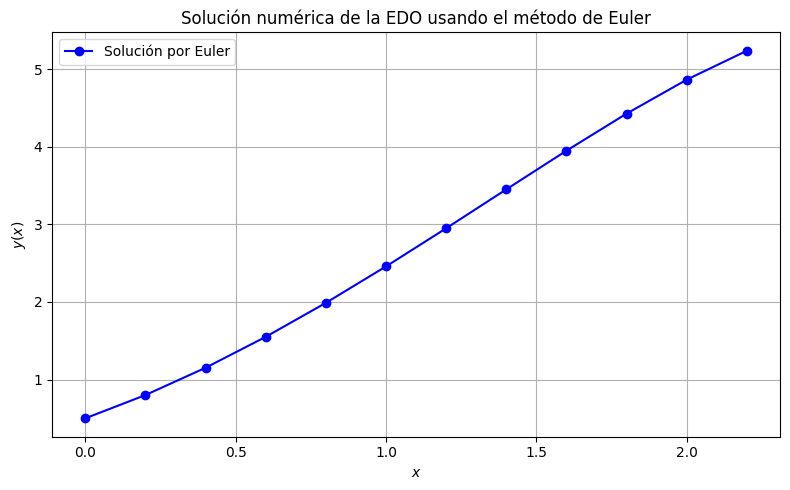

In [40]:
import matplotlib.pyplot as plt

# Graficar los puntos obtenidos con el método de Euler
plt.figure(figsize=(8, 5))
plt.plot(X, Y, marker='o', linestyle='-', color='blue', label='Solución por Euler')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.title("Solución numérica de la EDO usando el método de Euler")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
n_muestra = 8
idx_sample = np.linspace(0, len(X) - 1, n_muestra, dtype=int)
X_sample = X[idx_sample]
Y_sample = Y[idx_sample]
X_interp = np.linspace(X_sample[0], X_sample[-1], 300)

Polinomio de Lagrange:
            7             6            5           4           3
-0.0001895 x - 0.0001054 x - 0.004521 x - 0.01928 x - 0.08886 x
           2
 + 0.7093 x + 1.362 x + 0.5


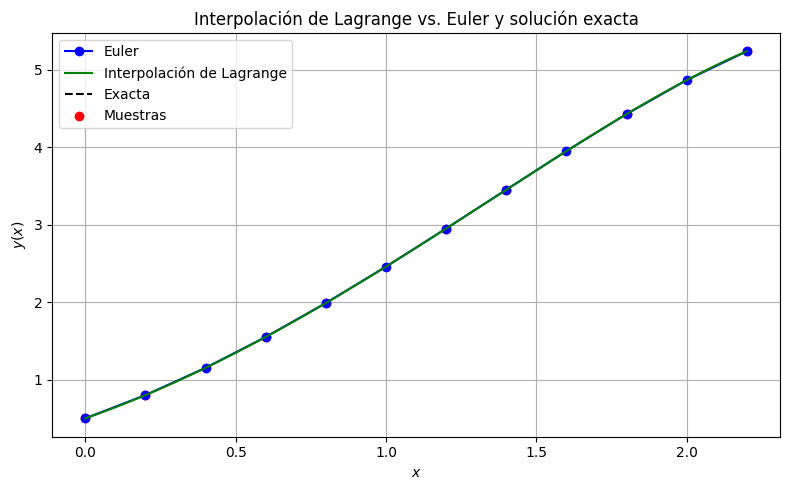

In [57]:
from moduloInterpolacion import polyInterpoLagrange, evalPoly, Neville, DiferenciasDivididas, NodosEquiespaciados, Hermite
from sympy import symbols, lambdify
import matplotlib.pyplot as plt

# Interpolación de Lagrange
coef_lagrange = polyInterpoLagrange((X_sample, Y_sample))
Y_interp_lagrange = evalPoly(coef_lagrange, X_interp)

# Evaluar la solución exacta si existe
if y_exact:
    Y_exact_interp = y_exact(X_interp)

plt.figure(figsize=(8, 5))

plt.plot(X, Y, 'o-', label='Euler', color='blue')
plt.plot(X_interp, Y_interp_lagrange, label='Interpolación de Lagrange', color='green')

# Evaluar y graficar la solución exacta si es posible
if y_exact:
    try:
        Y_exact_interp = []
        for xi in X_interp:
            try:
                val = y_exact(xi)
                if hasattr(val, 'evalf'):
                    val = val.evalf()
                Y_exact_interp.append(float(val))
            except:
                Y_exact_interp.append(np.nan)

        Y_exact_interp = np.array(Y_exact_interp)
        if not np.all(np.isnan(Y_exact_interp)):
            plt.plot(X_interp, Y_exact_interp, '--', label='Exacta', color='black')
        else:
            print("Todos los valores de y_exact son NaN.")

    except Exception as e:
        print("No se pudo graficar la solución exacta:", e)

from numpy import poly1d
print("Polinomio de Lagrange:")
print(poly1d(coef_lagrange))

plt.scatter(X_sample, Y_sample, color='red', label='Muestras')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.title('Interpolación de Lagrange vs. Euler y solución exacta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Polinomio de Neville:
                        7                         6                        5   ↪
- 0.000189452076321167⋅x  - 0.000105386307503084⋅x  - 0.00452138214145641⋅x  - ↪

↪                      4                       3                     2         ↪
↪  0.0192787026351931⋅x  - 0.0888600149157565⋅x  + 0.70926891642182⋅x  + 1.361 ↪

↪                    
↪ 86212699333⋅x + 0.5


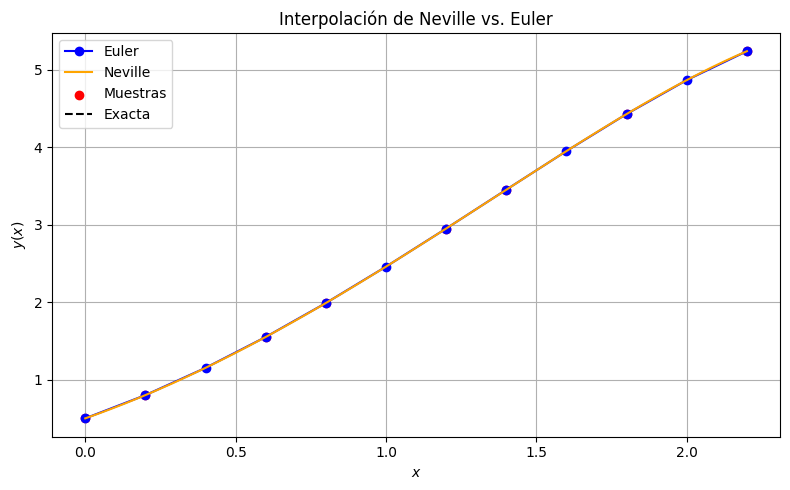

In [58]:
from sympy import symbols, lambdify

# Ejecutar método de Neville
neville_mat, _ = Neville((X_sample, Y_sample))

# Extraer el polinomio más completo (último no nulo de la última fila)
x_sym = symbols('x')
P_neville = None
for poly in reversed(neville_mat.flatten()):
    if poly != 0 and hasattr(poly, 'free_symbols') and x_sym in poly.free_symbols:
        P_neville = poly
        break

# Convertir a función evaluable y aplicar a X_interp
if P_neville is not None:
    P_neville_func = lambdify(x_sym, P_neville, modules=["numpy", "sympy"])
    Y_interp_neville = np.array([float(P_neville_func(xi)) for xi in X_interp])
else:
    Y_interp_neville = np.full_like(X_interp, np.nan)
    print("No se encontró un polinomio válido de Neville.")

# Grafica
plt.figure(figsize=(8, 5))
plt.plot(X, Y, 'o-', label='Euler', color='blue')
plt.plot(X_interp, Y_interp_neville, label='Neville', color='orange')
plt.scatter(X_sample, Y_sample, color='red', label='Muestras')

# Si se pudo evaluar solución exacta antes:
if 'solucion_exacta_valida' in locals() and solucion_exacta_valida:
    plt.plot(X_interp, Y_exact_interp, '--', label='Exacta', color='black')

import sympy as sp
print("Polinomio de Neville:")
sp.pprint(P_neville)


plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.title('Interpolación de Neville vs. Euler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Polinomio de Diferencias Divididas:
            7             6            5           4           3
-0.0001895 x - 0.0001054 x - 0.004521 x - 0.01928 x - 0.08886 x
           2
 + 0.7093 x + 1.362 x + 0.5


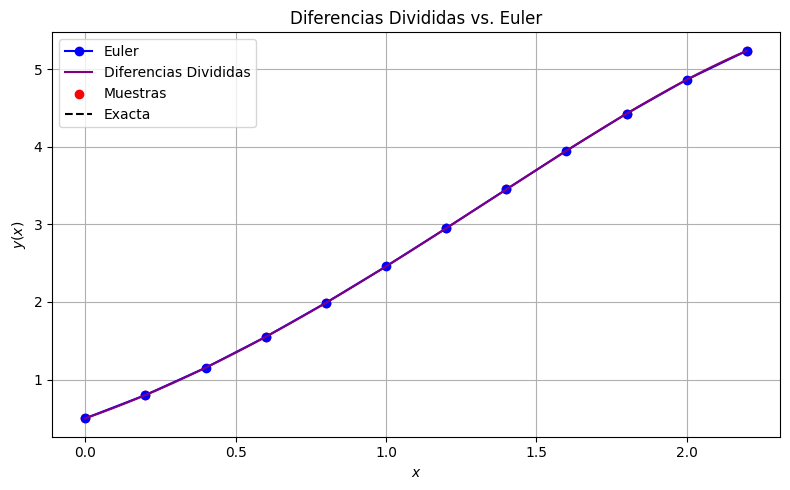

In [59]:
# Aplicar método de Diferencias Divididas
poly_dic_dd = DiferenciasDivididas((X_sample, Y_sample))

# Obtener el polinomio final (el más completo)
P_dd = poly_dic_dd[f'P{len(X_sample) - 1}']

# Evaluar el polinomio sobre la malla fina
Y_interp_dd = evalPoly(P_dd, X_interp)

# Graficar todo junto
plt.figure(figsize=(8, 5))
plt.plot(X, Y, 'o-', label='Euler', color='blue')
plt.plot(X_interp, Y_interp_dd, label='Diferencias Divididas', color='purple')
plt.scatter(X_sample, Y_sample, color='red', label='Muestras')

# Si se tiene la solución exacta evaluada antes
if 'solucion_exacta_valida' in locals() and solucion_exacta_valida:
    plt.plot(X_interp, Y_exact_interp, '--', label='Exacta', color='black')

print("Polinomio de Diferencias Divididas:")
print(poly1d(P_dd))

plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.title('Diferencias Divididas vs. Euler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Polinomio con Nodos Equiespaciados:
        7        6        5        4        3         2
-222.8 x + 1091 x - 2114 x + 2058 x - 1049 x + 262.9 x - 22.54 x + 0.5


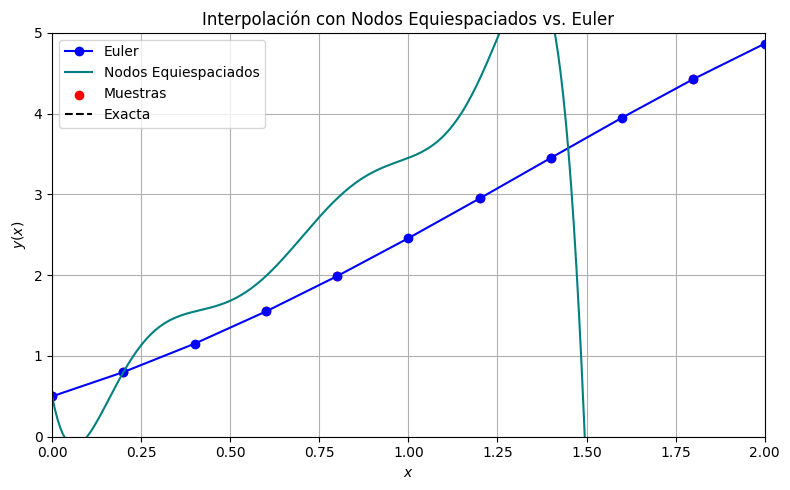

In [60]:
# Asegurar equiespaciado
X_sample = np.array(X_sample)
Y_sample = np.array(Y_sample)
h_eq = X_sample[1] - X_sample[0]
x0_eq = X_sample[0]

# Aplicar método de nodos equiespaciados
poly_dic_eq = NodosEquiespaciados(Y_sample, x0_eq, h_eq)

# Obtener polinomio completo
P_eq = poly_dic_eq[f'P{len(Y_sample)-1}']

# Paso 4: Evaluar el polinomio sobre la malla fina
Y_interp_eq = evalPoly(P_eq, X_interp)

# Paso 5: Graficar
plt.figure(figsize=(8, 5))
plt.plot(X, Y, 'o-', label='Euler', color='blue')
plt.plot(X_interp, Y_interp_eq, label='Nodos Equiespaciados', color='teal')
plt.scatter(X_sample, Y_sample, color='red', label='Muestras')

if 'solucion_exacta_valida' in locals() and solucion_exacta_valida:
    plt.plot(X_interp, Y_exact_interp, '--', label='Exacta', color='black')

print("Polinomio con Nodos Equiespaciados:")
print(poly1d(P_eq))

plt.xlim(0, 2)
plt.ylim(0, 5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.title('Interpolación con Nodos Equiespaciados vs. Euler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Polinomio de Hermite:
       15         14        13             12             11
-48.3 x  + 741.2 x  - 5113 x  + 2.095e+04 x  - 5.678e+04 x 
              10             9             8             7
 + 1.072e+05 x  - 1.444e+05 x + 1.402e+05 x - 9.753e+04 x
              6             5        4         3         2
 + 4.771e+04 x - 1.581e+04 x + 3317 x - 387.6 x + 18.79 x + 1.5 x + 0.5


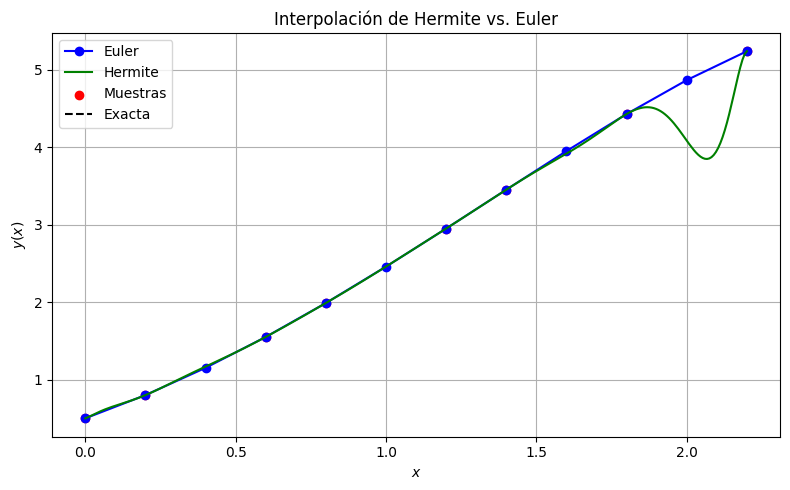

In [61]:
# Calcular derivadas aproximadas de Y en los puntos muestreados
dY_sample = np.gradient(Y_sample, X_sample)

# Aplicar interpolación de Hermite
coef_hermite = Hermite((X_sample, Y_sample, dY_sample))

# Evaluar el polinomio sobre la malla fina
Y_interp_hermite = evalPoly(coef_hermite, X_interp)

# Graficar resultado
plt.figure(figsize=(8, 5))
plt.plot(X, Y, 'o-', label='Euler', color='blue')
plt.plot(X_interp, Y_interp_hermite, label='Hermite', color='green')
plt.scatter(X_sample, Y_sample, color='red', label='Muestras')

# Si tienes solución exacta
if 'solucion_exacta_valida' in locals() and solucion_exacta_valida:
    plt.plot(X_interp, Y_exact_interp, '--', label='Exacta', color='black')
    
print("Polinomio de Hermite:")
print(poly1d(coef_hermite))

plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.title('Interpolación de Hermite vs. Euler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
